### Fund managers report their holdings every month. They don’t want to tell investors they lost money on meme stocks. So at the end of the month, they sell low-quality assets and buy high-quality assets, like bonds.

### We might be able to take advantage of this by buying bonds at the end of the month and selling them at the beginning of the month.

### Why does this work? The edge is probably too messy, too small, or just not interesting to professionals. Which makes it perfect for us.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

%matplotlib inline

In [2]:
tlt = yf.download("TLT", start="2002-01-01", end="2022-12-04")

[*********************100%***********************]  1 of 1 completed


In [3]:
tlt['log_return'] = np.log(tlt['Adj Close'] / tlt['Adj Close'].shift(1))
tlt['day_of_month'] = tlt.index.day
tlt['year'] = tlt.index.year

### Hypothesis
### We expect there to be positive returns in TLT toward the end of the month. We expect this because we think fund managers buy TLT at the end of the month. We expect there to be negative returns in TLT toward the beginning of the month. This is when fund managers sell their high-quality assets and go back to buying meme stocks.

<AxesSubplot:title={'center':'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

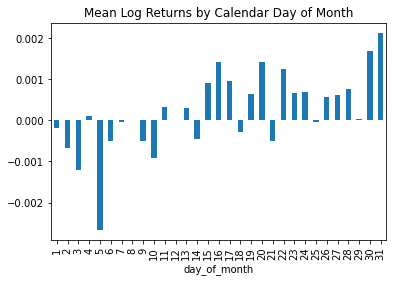

In [4]:
grouped_by_day = tlt.groupby("day_of_month")['log_return'].mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

### We see evidence that returns are positive during the last days of the month and negative during the first.

In [5]:
grouped_by_day_year = tlt.groupby(['day_of_month', 'year'])['log_return'].mean().reset_index()
grouped_by_day_year.head()

,day_of_month,year,log_return
0,1,2002,-0.003664
1,1,2003,-0.002912
2,1,2004,-0.002846
3,1,2005,-0.001227
4,1,2006,-0.000533


In [6]:
import seaborn as sns

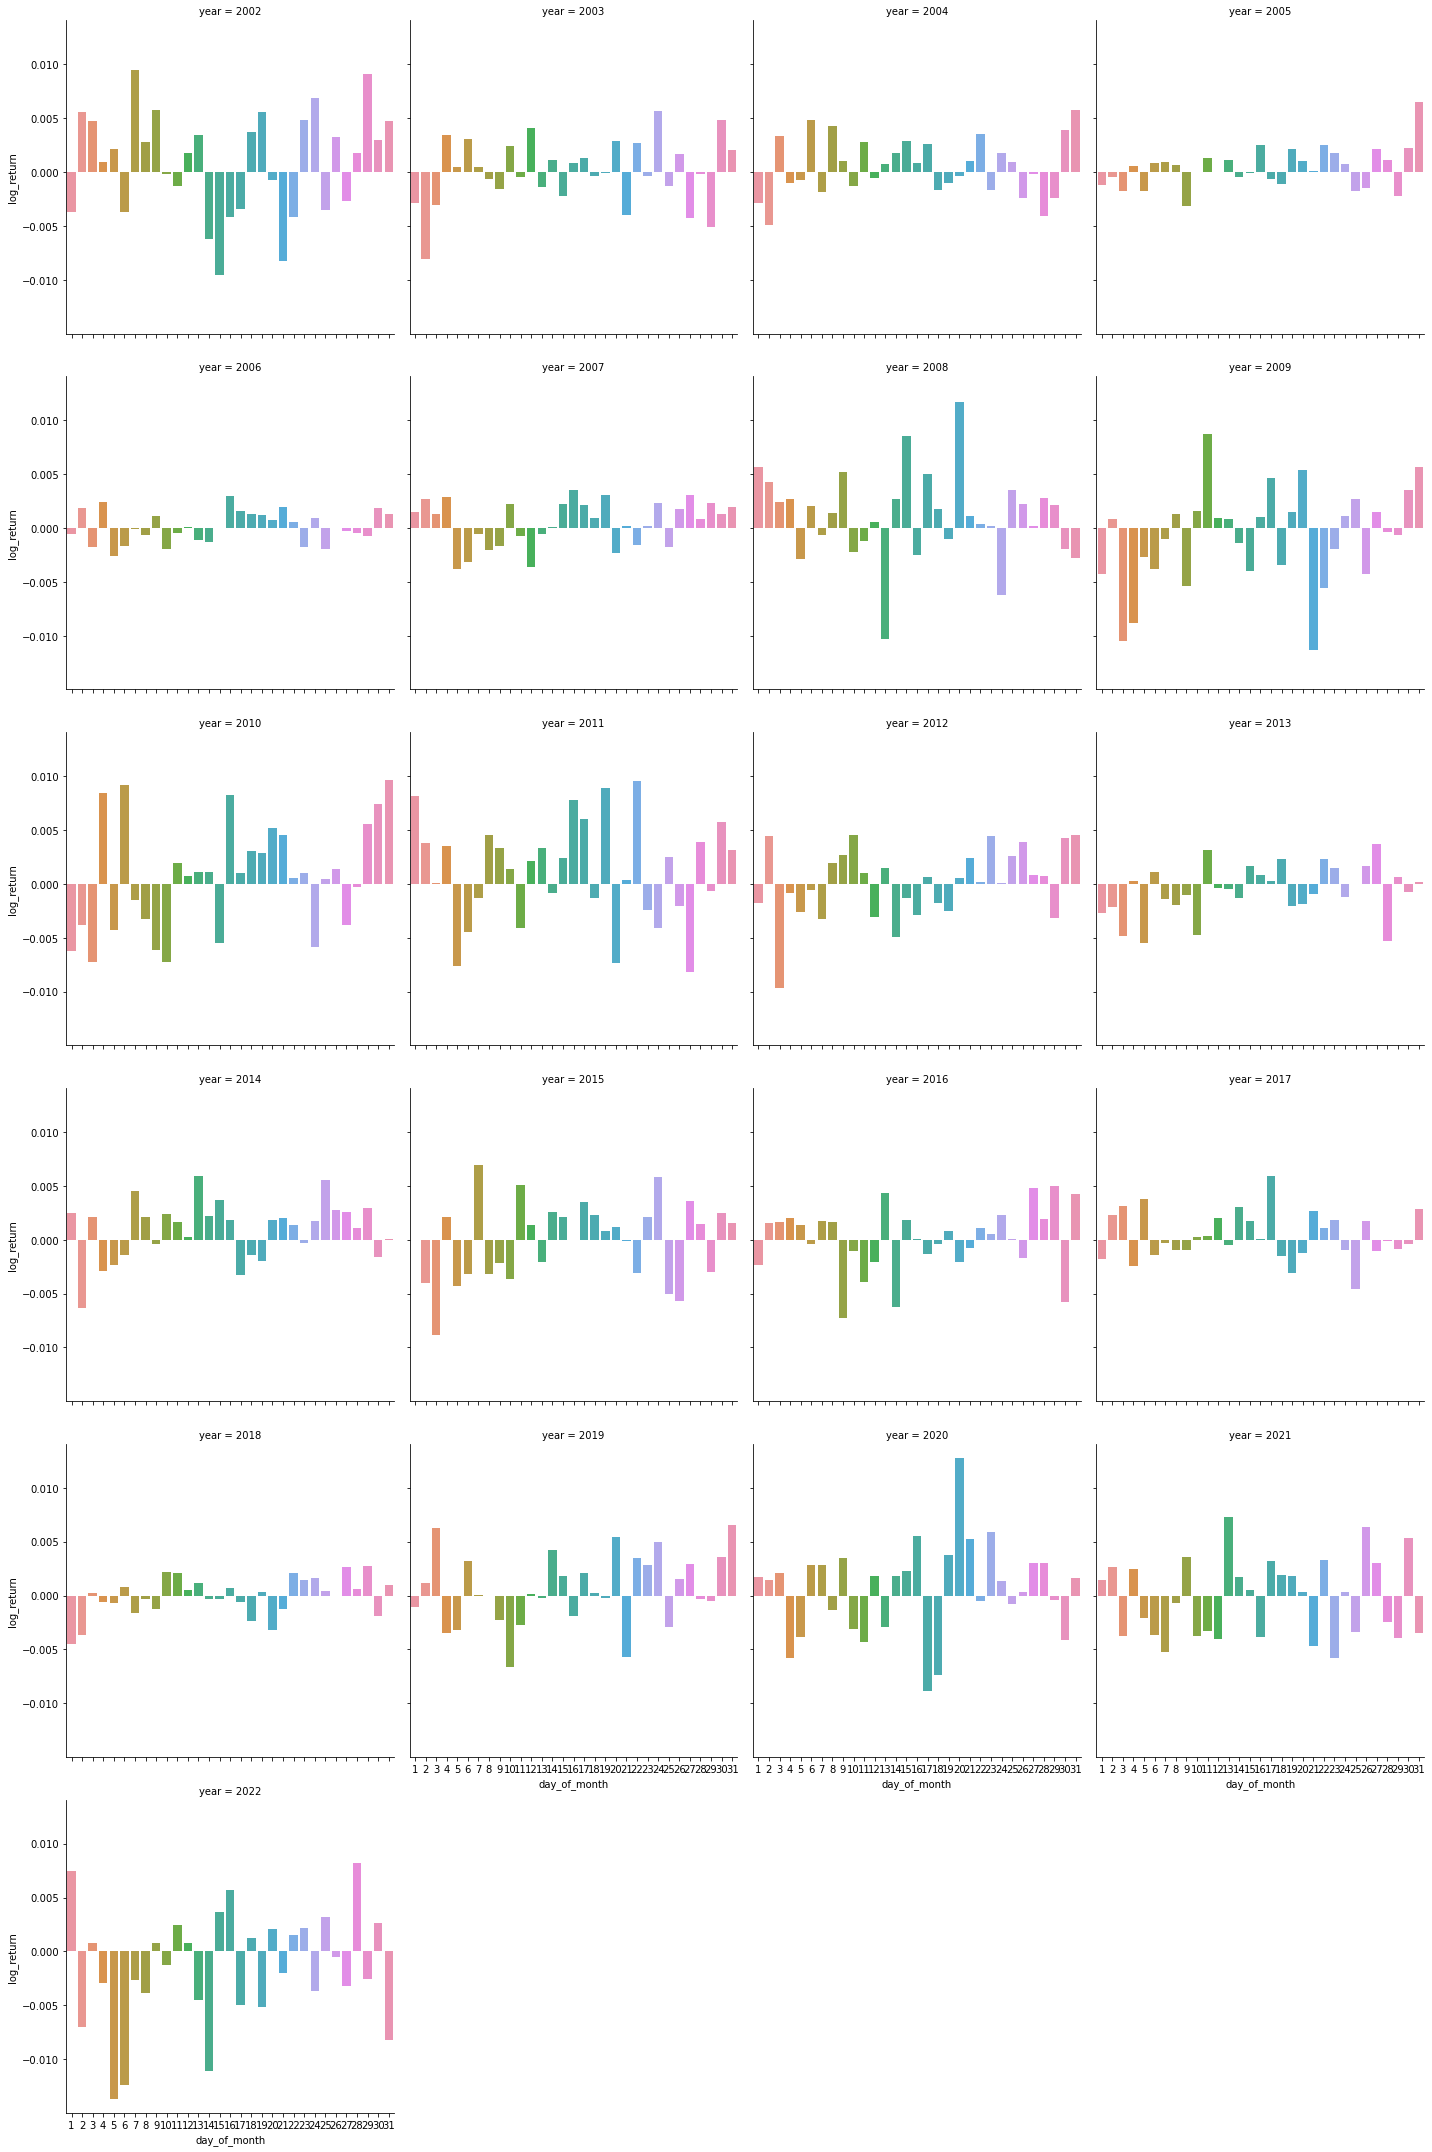

In [11]:
sns.catplot(x='day_of_month', y='log_return', col='year', data=grouped_by_day_year, kind='bar', col_wrap=4)